In [1]:

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,MaxPool2D,MaxPooling2D,GlobalAveragePooling2D

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:

x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

In [ ]:
print(f'shape of x_train_mnist={x_train_mnist.shape} , x_test_mnist={x_test_mnist.shape} , y_train_mnist={y_train_mnist.shape} and y_test_mnist={y_test_mnist.shape}')


shape of x_train_mnist=(60000, 28, 28) , x_test_mnist=(10000, 28, 28) , y_train_mnist=(60000,) and y_test_mnist=(10000,)


In [ ]:

x_train_mnist=x_train_mnist.reshape((x_train_mnist.shape[0],28,28,1))
x_test_mnist=x_test_mnist.reshape((x_test_mnist.shape[0],28,28,1))
y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)

In [ ]:
print(f'shape of x_train_mnist={x_train_mnist.shape} , x_test_mnist={x_test_mnist.shape} , y_train_mnist={y_train_mnist.shape} and y_test_mnist={y_test_mnist.shape}')


shape of x_train_mnist=(60000, 28, 28, 1) , x_test_mnist=(10000, 28, 28, 1) , y_train_mnist=(60000, 10) and y_test_mnist=(10000, 10)


In [ ]:
model=models.Sequential()

In [ ]:
def add_layer(parameter_layer,repeate):
  for i in range(0,repeate):
    model.add(layers.Conv2D(parameter_layer[0][2].numpy(), (parameter_layer[0][0].numpy(), parameter_layer[0][1].numpy()), activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(parameter_layer[1][2].numpy(), (parameter_layer[1][0].numpy(), parameter_layer[1][1].numpy()), activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(parameter_layer[2][2].numpy(), (parameter_layer[2][0].numpy(), parameter_layer[2][1].numpy()), activation='relu',padding='same'))
    model.add(layers.BatchNormalization())

In [ ]:
def resnet50(input_layer,repeate_each_layer):
  model.add(layers.Conv2D(64, (7, 7),strides=2, activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
  for i in range(input_layer.shape[0]):
    add_layer(input_layer[i],repeate_each_layer[i])

In [ ]:
data=tf.Variable([[[1,1,64],[3,3,64],[1,1,256]],[[1,1,128],[3,3,128],[1,1,512]],[[1,1,256],[3,3,256],[1,1,1024]],[[1,1,512],[3,3,512],[1,1,2024]]])
repeate=tf.Variable([3,4,6,3])
resnet50(data,repeate)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())


In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 11, 64)        3200      
                                                                 
 batch_normalization (Batch  (None, 11, 11, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          4160      
                                                                 
 batch_normalization_1 (Bat  (None, 5, 5, 64)          256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))


Epoch 1/5
938/938 [==============================] - 145s 92ms/step - loss: 1.1922 - accuracy: 0.5813 - val_loss: 1.0536 - val_accuracy: 0.7280
Epoch 2/5
938/938 [==============================] - 85s 90ms/step - loss: 0.3372 - accuracy: 0.8976 - val_loss: 0.3202 - val_accuracy: 0.9186
Epoch 3/5
938/938 [==============================] - 86s 92ms/step - loss: 0.1846 - accuracy: 0.9461 - val_loss: 0.2229 - val_accuracy: 0.9429
Epoch 4/5
938/938 [==============================] - 86s 92ms/step - loss: 0.1310 - accuracy: 0.9629 - val_loss: 0.1281 - val_accuracy: 0.9668
Epoch 5/5
938/938 [==============================] - 86s 92ms/step - loss: 0.1061 - accuracy: 0.9711 - val_loss: 0.1979 - val_accuracy: 0.9594


In [ ]:
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Trainable Parameters: {layer.count_params()}\n")

Layer Name: conv2d
Trainable Parameters: 3200

Layer Name: batch_normalization
Trainable Parameters: 256

Layer Name: max_pooling2d
Trainable Parameters: 0

Layer Name: conv2d_1
Trainable Parameters: 4160

Layer Name: batch_normalization_1
Trainable Parameters: 256

Layer Name: conv2d_2
Trainable Parameters: 36928

Layer Name: batch_normalization_2
Trainable Parameters: 256

Layer Name: conv2d_3
Trainable Parameters: 16640

Layer Name: batch_normalization_3
Trainable Parameters: 1024

Layer Name: conv2d_4
Trainable Parameters: 16448

Layer Name: batch_normalization_4
Trainable Parameters: 256

Layer Name: conv2d_5
Trainable Parameters: 36928

Layer Name: batch_normalization_5
Trainable Parameters: 256

Layer Name: conv2d_6
Trainable Parameters: 16640

Layer Name: batch_normalization_6
Trainable Parameters: 1024

Layer Name: conv2d_7
Trainable Parameters: 16448

Layer Name: batch_normalization_7
Trainable Parameters: 256

Layer Name: conv2d_8
Trainable Parameters: 36928

Layer Name: bat

313/313 [==============================] - 6s 15ms/step


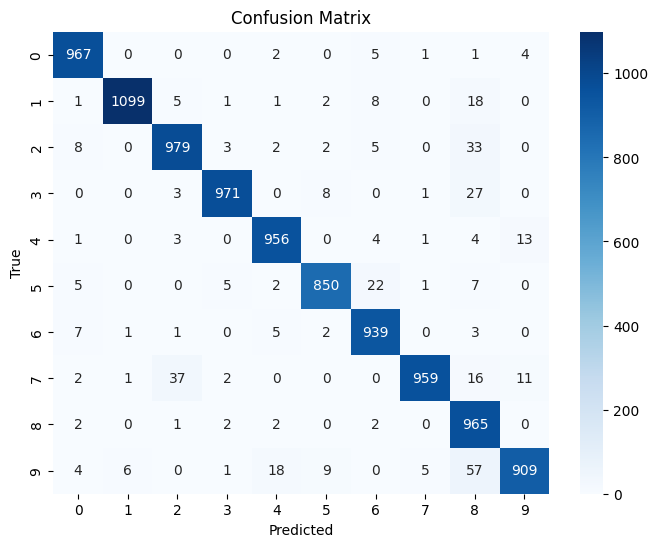

In [ ]:
import numpy as np
predictions = model.predict(x_test_mnist)
conf_matrix = confusion_matrix(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1))
# print("Confusion Matrix:")
# print(conf_matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1), average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.9615096682081304
Recall: 0.9594
F1 Score: 0.9596679014654228


VGG_pretrainning

In [2]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

In [4]:
x_train_mnist=x_train_mnist.reshape((x_train_mnist.shape[0],28,28,1))
x_test_mnist=x_test_mnist.reshape((x_test_mnist.shape[0],28,28,1))
y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)

In [5]:
import numpy as np
x_train_mnist=np.dstack([x_train_mnist] * 3)
x_test_mnist=np.dstack([x_test_mnist]*3)
x_train_mnist.shape,x_test_mnist.shape

((60000, 28, 84, 1), (10000, 28, 84, 1))

In [6]:
x_train_mnist = x_train_mnist.reshape(-1, 28,28,3)
x_test_mnist= x_test_mnist.reshape (-1,28,28,3)
x_train_mnist.shape,x_test_mnist.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [7]:
from keras.preprocessing.image import img_to_array, array_to_img

x_train_mnist = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_mnist])
x_test_mnist = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_mnist])
#train_x = preprocess_input(x)
x_train_mnist.shape,x_test_mnist.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [8]:
print(f'shape of x_train_mnist={x_train_mnist.shape} , x_test_mnist={x_test_mnist.shape} , y_train_mnist={y_train_mnist.shape} and y_test_mnist={y_test_mnist.shape}')


shape of x_train_mnist=(60000, 48, 48, 3) , x_test_mnist=(10000, 48, 48, 3) , y_train_mnist=(60000, 10) and y_test_mnist=(10000, 10)


In [9]:
input_Layer=layers.Input(shape=(48,48,3))

In [10]:
model_vgg16=VGG16(weights='imagenet',input_tensor=input_Layer,include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [12]:
from keras.applications.vgg16 import preprocess_input

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
output_layer=layers.Dense(10,activation='softmax')(flatten)
model=models.Model(inputs=input_Layer,outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [13]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/5
938/938 [==============================] - 76s 66ms/step - loss: 2.2666 - accuracy: 0.1337 - val_loss: 2.1096 - val_accuracy: 0.2076
Epoch 2/5
938/938 [==============================] - 58s 62ms/step - loss: 1.9559 - accuracy: 0.2840 - val_loss: 1.8324 - val_accuracy: 0.3349
Epoch 3/5
938/938 [==============================] - 58s 61ms/step - loss: 1.7683 - accuracy: 0.3608 - val_loss: 1.7117 - val_accuracy: 0.3872
Epoch 4/5
938/938 [==============================] - 58s 61ms/step - loss: 1.6936 - accuracy: 0.3907 - val_loss: 1.6843 - val_accuracy: 0.3958
Epoch 5/5
938/938 [==============================] - 60s 64ms/step - loss: 1.6510 - accuracy: 0.4043 - val_loss: 1.6519 - val_accuracy: 0.4014


In [14]:
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Trainable Parameters: {layer.count_params()}\n")

Layer Name: input_1
Trainable Parameters: 0

Layer Name: block1_conv1
Trainable Parameters: 1792

Layer Name: block1_conv2
Trainable Parameters: 36928

Layer Name: block1_pool
Trainable Parameters: 0

Layer Name: block2_conv1
Trainable Parameters: 73856

Layer Name: block2_conv2
Trainable Parameters: 147584

Layer Name: block2_pool
Trainable Parameters: 0

Layer Name: block3_conv1
Trainable Parameters: 295168

Layer Name: block3_conv2
Trainable Parameters: 590080

Layer Name: block3_conv3
Trainable Parameters: 590080

Layer Name: block3_pool
Trainable Parameters: 0

Layer Name: block4_conv1
Trainable Parameters: 1180160

Layer Name: block4_conv2
Trainable Parameters: 2359808

Layer Name: block4_conv3
Trainable Parameters: 2359808

Layer Name: block4_pool
Trainable Parameters: 0

Layer Name: block5_conv1
Trainable Parameters: 2359808

Layer Name: block5_conv2
Trainable Parameters: 2359808

Layer Name: block5_conv3
Trainable Parameters: 2359808

Layer Name: block5_pool
Trainable Paramete

313/313 [==============================] - 3s 11ms/step


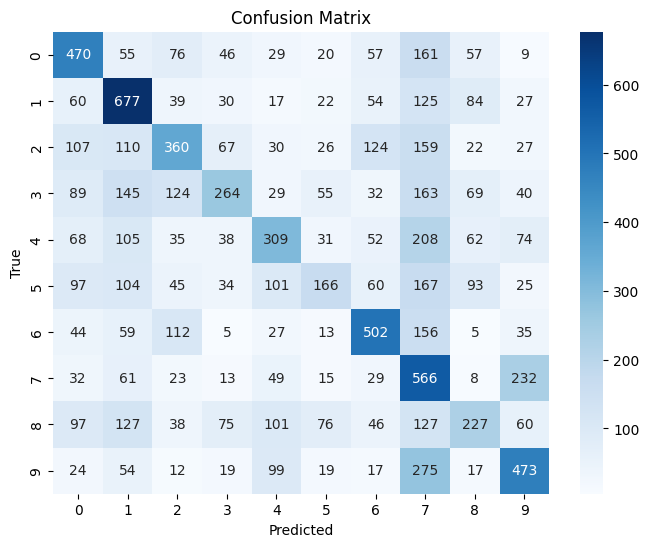

In [15]:
predictions = model.predict(x_test_mnist)
conf_matrix = confusion_matrix(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1))
# print("Confusion Matrix:")
# print(conf_matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [16]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1), average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.4125699760564831
Recall: 0.4014
F1 Score: 0.39356899406326196
